In [2]:
#import the libraries
import numpy as np
import pandas as pd

# Get the data

In [9]:
#column_name=['user_id','movieId','rating','timestamp']

In [31]:
# read the dataset
df=pd.read_csv('ratings.csv')

In [32]:
#print and check the first five rows
df.head(10)

,user_id,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


In [33]:
#read the movie titles
movie_title=pd.read_csv('movies.csv')

In [34]:
movie_title.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# merge both datasets together

In [35]:
#merge both datasets together with item_id being in common
# hence merge it on item_id to avoid multiple same columns
df=pd.merge(df,movie_title,on='movieId')

In [36]:
#print and check the first 5 rows
df.head(5)

,user_id,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [37]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
#set style of the graph to be plotted
sns.set_style('white')

In [39]:
#index the datasets by titles and sort them in descending order by ratings's mean value
#print first ten rows by head
df.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
The Revenant (2015)                  5.0
Julia (2008)                         5.0
Dad (1989)                           5.0
Strait-Jacket (1964)                 5.0
21 Up (1977)                         5.0
Name: rating, dtype: float64

In [41]:
#create dataframe by index name as title
ratings=pd.DataFrame(df.groupby('title')['rating'].mean())

In [42]:
ratings.head()

,rating
title,
'71 (2014),3.500
'Hellboy': The Seeds of Creation (2004),3.000
'Round Midnight (1986),2.500
'Til There Was You (1997),4.000
"'burbs, The (1989)",3.125


# Set the number of ratings column 

In [43]:
#set includes count of ratings in dataframes
ratings['rating_numbers']=pd.DataFrame(df.groupby('title')['rating'].count())

In [44]:
ratings.head()

,rating,rating_numbers
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


# Number of ratings histogram

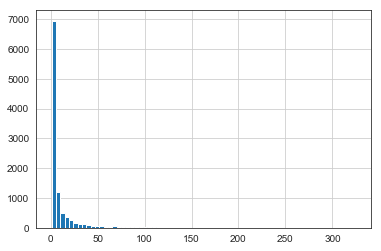

In [45]:
#plot the histogram with rating numbers
# to get an idea about a dataset
ratings['rating_numbers'].hist(bins=70)

# Average rating per movie histogram

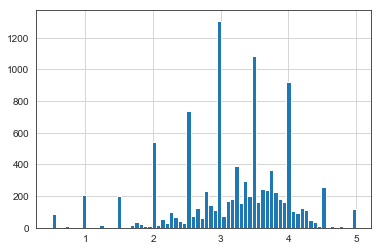

In [46]:
#plot histogram with rating count to get an idea about the dataset
ratings['rating'].hist(bins=70)


# Relationship between the average rating and the actual ratings

# The larger the number of ratings ,the more likely the rating of the movie is

C:\ProgramData\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


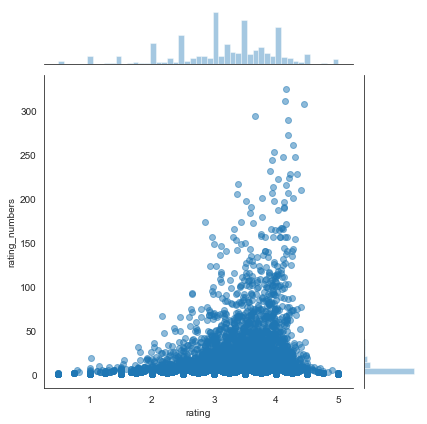

In [48]:
# Create seaborn joint rating plot with x axis as rating and y axis as rating numbers and datframe as rating
sns.jointplot(x='rating',y='rating_numbers',data=ratings,alpha=0.5)

# Recommending similar Movies

#### Let's create a matrix that has the user ids on one access and the movie title on another axis.Each cell will then consist of the rating the user gave to that movie. The NaN values are due to the reason that most of the people have not seen most of the movies.

In [49]:
# creates a matrix of two rows describing the user_id and movie titles
# the following rows describe user and its rating for that particular movie beneath 
#that a lot of vlaues are filled with NaN which means that user_id has not rated the movie 
moviematrix=df.pivot_table(index='user_id',columns='title',values='rating')

#print first 5 rows of rating data
moviematrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
#sort the data frames by rating_numbers in descending order and print the first 10 rows 
ratings.sort_values('rating_numbers',ascending=False).head(10)

,rating,rating_numbers
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


#### Let's choose two movies for our system:Jurassic Park and Shawshank Redemption.


What are the user ratings for those two movies?

In [51]:
#find the user ratings from the matrix created above for the movie Shawshank Redemption
ShawshankRedemption_user_ratings=moviematrix['Shawshank Redemption, The (1994)']

#find the user ratings from the matrix created above for the movie 
JurassicPark_user_ratings=moviematrix['Jurassic Park (1993)']

In [53]:
#print first five rows
ShawshankRedemption_user_ratings.head()

user_id
1    4.0
2    NaN
3    NaN
4    4.0
5    NaN
Name: Shawshank Redemption, The (1994), dtype: float64

In [55]:
# find every other movie which is similar to Shawshank Redemption
#I have used corrwith method of pandas to find the movies with similar user ratings as that of Shawshank Redemption.
similar_to_ShawshankRedemption=moviematrix.corrwith(ShawshankRedemption_user_ratings)

#print first 10 rows of similar kind of movies
similar_to_ShawshankRedemption.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                       NaN
'burbs, The (1989)                         0.328524
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.444106
*batteries not included (1987)             0.238302
...And Justice for All (1979)             -0.272166
10 (1979)                                  0.944911
dtype: float64

In [56]:
#correlation of every other movie to that specific user behaviour on the Jurassic Park movie 

In [62]:
#find every other movie similar to Jurassic Park.
#I have used corrwith method of pandas to find the movies with similar user ratings as that of Jurassic Park.
similar_to_JurassicPark=moviematrix.corrwith(JurassicPark_user_ratings)

#print the first 10 rows of similar kind of movies.
similar_to_JurassicPark.head(10)


title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Til There Was You (1997)                  1.000000
'burbs, The (1989)                         0.635632
'night Mother (1986)                            NaN
(500) Days of Summer (2009)               -0.178492
*batteries not included (1987)             0.325396
...And Justice for All (1979)             -0.182574
10 (1979)                                  1.000000
dtype: float64

#### Remove the NaN values and use a DF instead of series 

In [63]:
# create a data frame of similar movies with one column as correlation and drop all NaN values
corr_ShawshankRedemption=pd.DataFrame(similar_to_ShawshankRedemption,columns=['Correlation'])

# use dropna to drop all the NaN values
corr_ShawshankRedemption.dropna(inplace=True)

In [64]:
# print the first 10 rows
corr_ShawshankRedemption.head(10)

,Correlation
title,
"'burbs, The (1989)",0.328524
(500) Days of Summer (2009),0.444106
*batteries not included (1987),0.238302
...And Justice for All (1979),-0.272166
10 (1979),0.944911
10 Items or Less (2006),0.970725
10 Things I Hate About You (1999),0.338851
100 Girls (2000),-1.000000
101 Dalmatians (1996),0.189810


# Perfectly correlated movies with Shawshank Redemption ?

#### most likely these movies happen to have been seen only by one person who also happened to rate Shawshank Redemption 5 stars

In [65]:
# sort the dataframe by correaltion column
# assuming that all the movies which are rated similar to Shawshank Redemption will appaer at first
corr_ShawshankRedemption.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
Music Box (1989),1.0
"Art of the Steal, The (2009)",1.0
Next Friday (2000),1.0
Nicholas Nickleby (2002),1.0
"Bridge of San Luis Rey, The (2004)",1.0
Gonzo: The Life and Work of Dr. Hunter S. Thompson (2008),1.0
Friday the 13th Part VIII: Jason Takes Manhattan (1989),1.0
"Invisible, The (2007)",1.0
"Flower of My Secret, The (La flor de mi secreto) (1995)",1.0


# Set a threshold for the number of ratings necessary and filter out movies that have less than a certain number of reviews

###  Join 'number of ratings' columns to our dataframe

In [66]:
# use the rating number columns from rating dataframe
#and join it in corr_ShawshankRedemption so that we acn decide in future on ratings as well
corr_ShawshankRedemption=corr_ShawshankRedemption.join(ratings['rating_numbers'],how='left',lsuffix='_left',rsuffix='_right')

# print the new dataframe
# joining number of ratings to it
corr_ShawshankRedemption.head()

,Correlation,rating_numbers
title,,
"'burbs, The (1989)",0.328524,20
(500) Days of Summer (2009),0.444106,37
*batteries not included (1987),0.238302,11
...And Justice for All (1979),-0.272166,10
10 (1979),0.944911,3


### filter out movies than have less than 100 reviews(this value was chosen based of the ratings histogram above)

In [68]:
#only print the movies which has been rated by more thsan 100 peaople and have similar correlation 
#used comparison operator to do so
corr_ShawshankRedemption[corr_ShawshankRedemption['rating_numbers']>100].sort_values('Correlation',ascending=False).head(100)

,Correlation,rating_numbers
title,,
"Shawshank Redemption, The (1994)",1.000000,308
"Green Mile, The (1999)",0.534292,101
Forrest Gump (1994),0.471145,311
"Hunt for Red October, The (1990)",0.448575,108
Star Wars: Episode I - The Phantom Menace (1999),0.389682,136
Minority Report (2002),0.381212,108
Saving Private Ryan (1998),0.380843,187
Star Trek: Generations (1994),0.376205,115
Jerry Maguire (1996),0.374303,124


#### Remove the NaN values and use a DF instead of series 

In [69]:
# create a data frame of similar movies with one column as correlation and drop all NaN values
corr_JurassicPark=pd.DataFrame(similar_to_JurassicPark,columns=['Correlation'])

# use dropna to drop all the NaN values
corr_JurassicPark.dropna(inplace=True)

In [70]:
corr_JurassicPark.head(10)

,Correlation
title,
'Til There Was You (1997),1.000000
"'burbs, The (1989)",0.635632
(500) Days of Summer (2009),-0.178492
*batteries not included (1987),0.325396
...And Justice for All (1979),-0.182574
10 (1979),1.000000
10 Items or Less (2006),-1.000000
10 Things I Hate About You (1999),0.368829
"10,000 BC (2008)",0.803116


# Perfectly correlated movies with Jurassic Park ?

#### most likely these movies happen to have been seen only by one person who also happened to rate Jurassic Park 5 stars

In [71]:
# sort the dataframe by correaltion column
# assuming that all the movies which are rated similar to Jurassic Park will appaer at first
corr_JurassicPark.sort_values('Correlation',ascending=False).head(10)


,Correlation
title,
"Castle, The (1997)",1.0
Hero at Large (1980),1.0
Speechless (1994),1.0
"Specials, The (2000)",1.0
Sonatine (Sonachine) (1993),1.0
Solomon Kane (2009),1.0
"I Love You, Beth Cooper (2009)",1.0
I'll Be Home For Christmas (1998),1.0
Birth (2004),1.0


# Set a threshold for the number of ratings necessary and filter out movies that have less than a certain number of reviews

###  Join 'number of ratings' columns to our dataframe

In [72]:
# use the rating number columns from rating dataframe
#and join it in corr_JurassicPark so that we can decide in future on ratings as well
corr_JurassicPark=corr_JurassicPark.join(ratings['rating_numbers'],how='left',lsuffix='_left',rsuffix='_right')

# print the new dataframe
# joining number of ratings to it
corr_JurassicPark.head()

,Correlation,rating_numbers
title,,
'Til There Was You (1997),1.000000,3
"'burbs, The (1989)",0.635632,20
(500) Days of Summer (2009),-0.178492,37
*batteries not included (1987),0.325396,11
...And Justice for All (1979),-0.182574,10


### filter out movies than have less than 100 reviews(this value was chosen based of the ratings histogram above)

In [73]:
#only print the movies which has been rated by more thsan 100 peaople and have similar correlation 
#used comparison operator to do so
corr_JurassicPark[corr_JurassicPark['rating_numbers']>100].sort_values('Correlation',ascending=False).head(100)

,Correlation,rating_numbers
title,,
Jurassic Park (1993),1.000000,294
Twister (1996),0.516156,141
Speed (1994),0.493329,197
Back to the Future (1985),0.469993,213
Shrek (2001),0.469194,158
Indiana Jones and the Last Crusade (1989),0.460905,167
Terminator 2: Judgment Day (1991),0.459030,253
Cliffhanger (1993),0.453119,114
"Terminator, The (1984)",0.452682,164


#                                              End of code